<a href="https://colab.research.google.com/github/elainehanania0/Projects/blob/main/Auto_Insurance_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



In [ ]:
df = pd.read_csv("/content/insurance.csv")
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [ ]:
#check unique values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [ ]:
#check shape
df.shape

(1000, 40)

<ipython-input-8-ea762090ba66>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr())


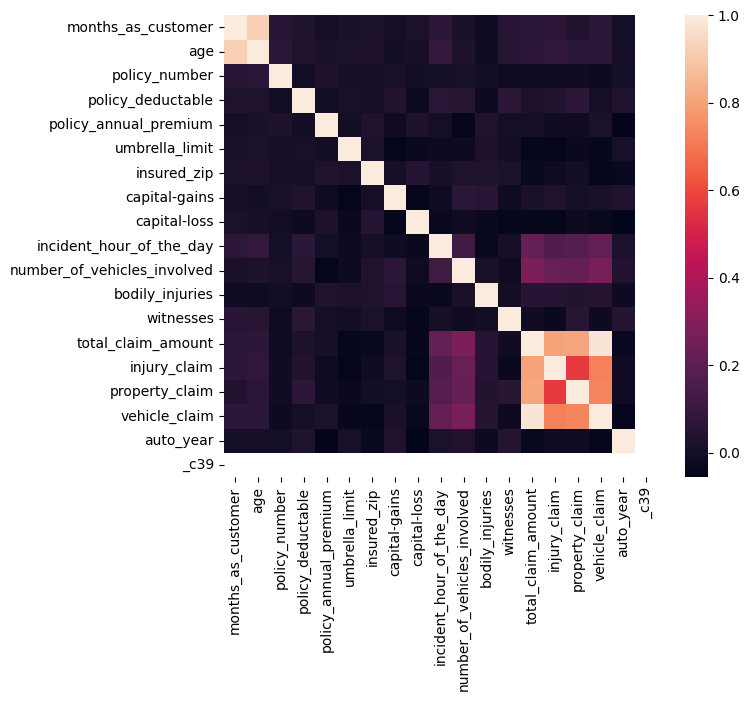

In [ ]:
plt.figure(figsize=(7,6))
dataplot = sns.heatmap(df.corr())

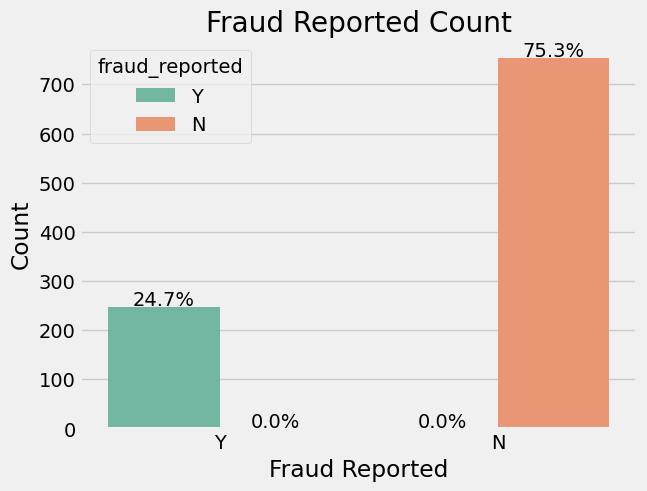

In [ ]:
# Set the style and color palette
plt.style.use('fivethirtyeight')
sns.set_palette("Set2")

# Create the count plot
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

# Customize the plot
ax.set_title("Fraud Reported Count")
ax.set_xlabel("Fraud Reported")
ax.set_ylabel("Count")

# Add annotations
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

# Show the plot
plt.show()

In [ ]:
df['fraud_reported'].value_counts() # Count number of frauds vs non-frauds

N    753
Y    247
Name: fraud_reported, dtype: int64

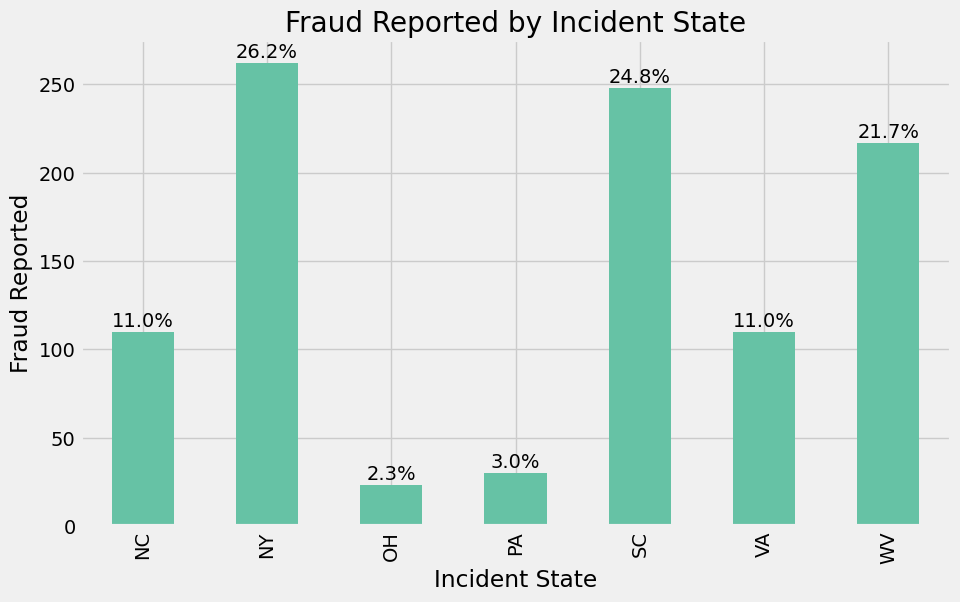

In [ ]:
# Set the style and color palette
plt.style.use('fivethirtyeight')
sns.set_palette("Set2")

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Group and plot the data
df.groupby('incident_state').fraud_reported.count().plot(kind='bar', ylim=0, ax=ax)

# Customize the plot
ax.set_title("Fraud Reported by Incident State")
ax.set_xlabel("Incident State")
ax.set_ylabel("Fraud Reported")

# Add annotations
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

# Show the plot
plt.show()

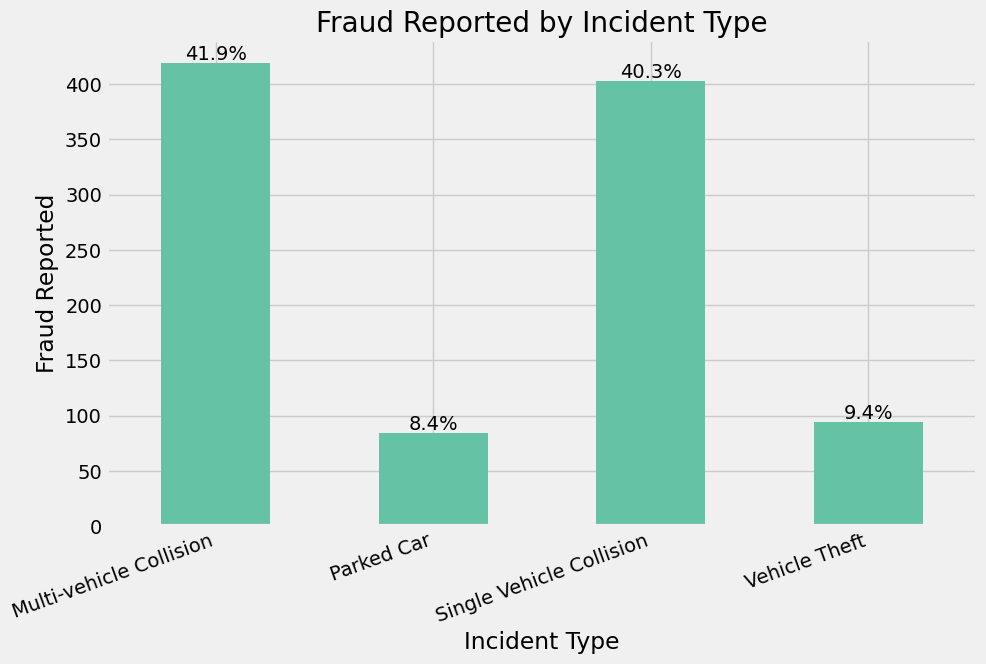

In [ ]:
# Set the style and color palette
plt.style.use('fivethirtyeight')
sns.set_palette("Set2")

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Group and plot the data
df.groupby('incident_type').fraud_reported.count().plot(kind='bar', ylim=0, ax=ax)

# Customize the plot
ax.set_title("Fraud Reported by Incident Type")
ax.set_xlabel("Incident Type")
ax.set_ylabel("Fraud Reported")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")

# Add annotations
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

# Show the plot
plt.show()

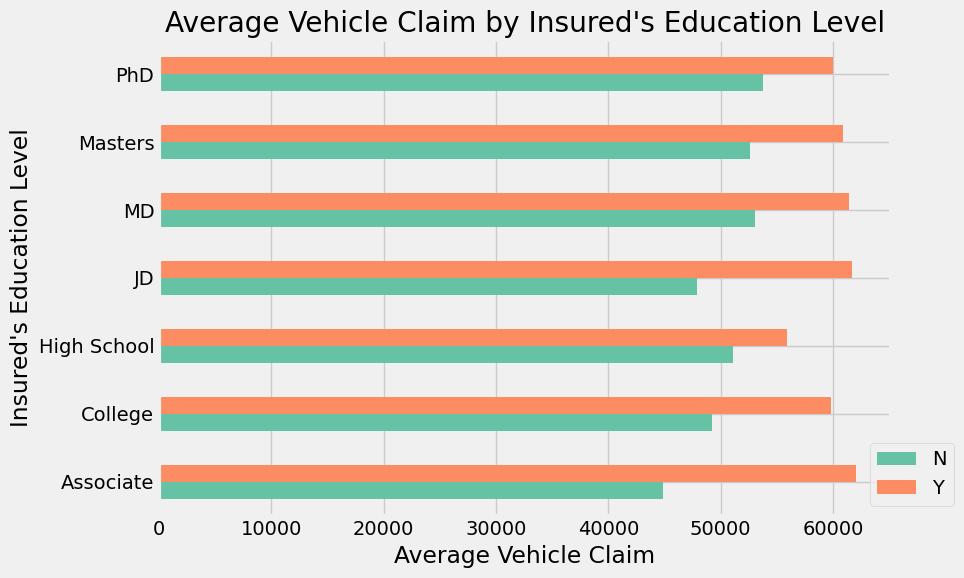

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Group and calculate the average vehicle claim by insured's education level, grouped by fraud reported
average_claim = df.groupby(['insured_education_level', 'fraud_reported'])['total_claim_amount'].mean().unstack()

# Plot the data
average_claim.plot(kind='barh', ax=ax)

# Customize the plot
ax.set_title("Average Vehicle Claim by Insured's Education Level")
ax.set_xlabel("Average Vehicle Claim")
ax.set_ylabel("Insured's Education Level")

# Add legend
ax.legend(title='Fraud Reported')

# Move the legend to the lower right
plt.legend(bbox_to_anchor =(1.1,0), loc='lower right')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#Drop columns not useful for us
# droping columns based on above result
df = df.drop(['_c39','policy_csl','incident_location', 'policy_bind_date', 'incident_date', 'auto_model', 'insured_occupation', 'policy_number'], axis=1)


In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported'],
      dtype='object')

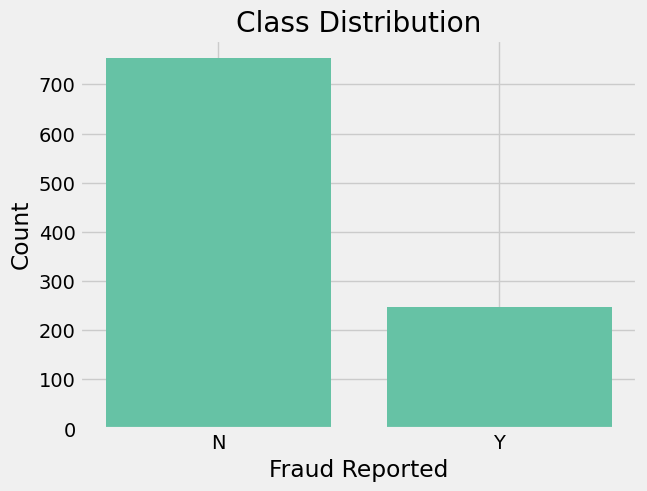

In [ ]:
#Plotting our target values
import matplotlib.pyplot as plt

# Count the occurrences of each class in the target variable
class_counts = df['fraud_reported'].value_counts()

# Create a bar plot to visualize the class distribution
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [ ]:
#So we have class imbalance problem lets deal with it

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Separate the features and the target variable
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

# Apply Random Over-Sampling Examples (ROSE) to resample the target variable
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['fraud_reported'] = y_resampled


In [ ]:
df_resampled.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,1000,1406.91,0,466132,MALE,MD,sleeping,...,1,2,YES,71610,6510,13020,52080,Saab,2004,Y
1,228,42,IN,2000,1197.22,5000000,468176,MALE,MD,reading,...,0,0,?,5070,780,780,3510,Mercedes,2007,Y
2,134,29,OH,2000,1413.14,5000000,430632,FEMALE,PhD,board-games,...,2,3,NO,34650,7700,3850,23100,Dodge,2007,N
3,256,41,IL,2000,1415.74,6000000,608117,FEMALE,PhD,board-games,...,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y
4,228,44,IL,1000,1583.91,6000000,610706,MALE,Associate,board-games,...,0,1,NO,6500,1300,650,4550,Accura,2009,N


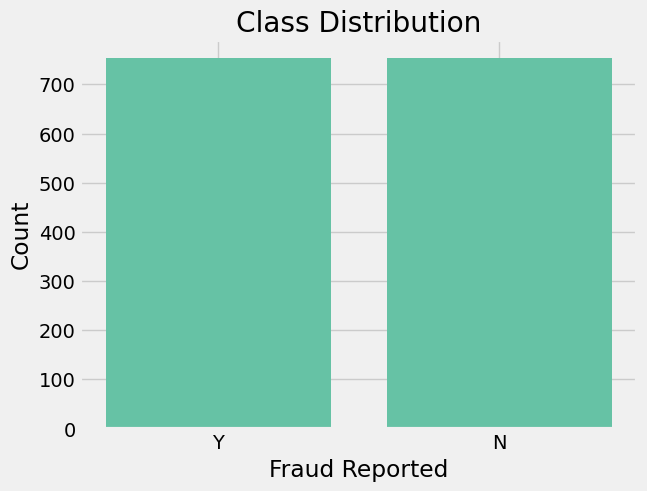

In [ ]:
#Now lets check the target classes
#Plotting our target values
import matplotlib.pyplot as plt

# Count the occurrences of each class in the target variable
class_counts = df_resampled['fraud_reported'].value_counts()

# Create a bar plot to visualize the class distribution
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

## **Machine Learning Algorithm (Random Forest, KNN, SVM, Logistic Regression, Decision Tree)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, make_scorer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# Prepare the data
X = df_resampled.drop('fraud_reported', axis=1)
y = df_resampled['fraud_reported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the feature engineering pipeline
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessing = [
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('scaling', StandardScaler(), numerical_features)
]
preprocessor = ColumnTransformer(transformers=preprocessing)

# Initialize the classifiers
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42))
]

# Define the custom scoring function for F1-score
f1_scorer = make_scorer(f1_score, pos_label='Y')

# Train and evaluate each classifier using k-fold cross-validation
results = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for clf_name, clf in classifiers:
    clf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    f1_scores = cross_val_score(clf_pipeline, X_train, y_train, cv=kf, scoring=f1_scorer)  # Use the custom F1 scorer
    accuracy_scores = cross_val_score(clf_pipeline, X_train, y_train, cv=kf, scoring='accuracy')
    results[clf_name] = {'F1-score': f1_scores, 'Accuracy': accuracy_scores}

# Print the k-fold scores for each classifier
for clf_name, metrics in results.items():
    f1_percentage = [score * 100 for score in metrics['F1-score']]
    accuracy_percentage = [score * 100 for score in metrics['Accuracy']]

    print(f"{clf_name}:")
    print(f"   F1-scores (%): {', '.join([f'{score:.2f}' for score in f1_percentage])}")
    print(f"   Accuracy (%): {', '.join([f'{score:.2f}' for score in accuracy_percentage])}")
    print()

# Find the best algorithm based on average F1-score
best_algorithm = max(results, key=lambda x: np.mean(results[x]['F1-score']))
print(f"The best algorithm based on average F1-score is: {best_algorithm}")

Random Forest:
   F1-scores (%): 89.06, 91.50, 94.12, 91.57, 90.55
   Accuracy (%): 88.38, 91.29, 94.19, 91.29, 90.00

KNN:
   F1-scores (%): 68.48, 66.67, 68.57, 66.41, 63.49
   Accuracy (%): 66.39, 68.05, 68.05, 64.32, 61.67

SVM:
   F1-scores (%): 87.45, 85.96, 90.52, 90.08, 86.85
   Accuracy (%): 87.14, 86.31, 90.87, 90.04, 86.25

Logistic Regression:
   F1-scores (%): 83.95, 83.76, 84.75, 89.26, 81.93
   Accuracy (%): 83.82, 84.23, 85.06, 89.21, 81.25

Decision Tree:
   F1-scores (%): 88.80, 89.52, 90.24, 90.76, 87.90
   Accuracy (%): 88.38, 89.21, 90.04, 90.46, 87.50

The best algorithm based on average F1-score is: Random Forest


In [ ]:
X_test.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year'],
      dtype='object')

In [ ]:
# Fit the entire pipeline with the training data
clf_pipeline.fit(X_train, y_train)

# Make predictions for 10 examples
sample_predictions = clf_pipeline.predict(X_test[:10])
actual_results = y_test[:10]

# Print the sample predictions and actual results
print("Sample Predictions vs Actual Results:")
for i in range(10):
    print(f"Example {i+1}:")
    print(f"   Prediction: {sample_predictions[i]}")
    print(f"   Actual Result: {actual_results.iloc[i]}")
    print()


Sample Predictions vs Actual Results:
Example 1:
   Prediction: N
   Actual Result: N

Example 2:
   Prediction: Y
   Actual Result: Y

Example 3:
   Prediction: N
   Actual Result: Y

Example 4:
   Prediction: N
   Actual Result: N

Example 5:
   Prediction: N
   Actual Result: N

Example 6:
   Prediction: Y
   Actual Result: Y

Example 7:
   Prediction: N
   Actual Result: N

Example 8:
   Prediction: Y
   Actual Result: Y

Example 9:
   Prediction: Y
   Actual Result: Y

Example 10:
   Prediction: Y
   Actual Result: Y



## **Custom Feature Engineering (CustomTransformer and ColumnTransformer module)**

In [ ]:
# Prepare the data
X = df_resampled.drop('fraud_reported', axis=1)
y = df_resampled['fraud_reported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the custom transformer to handle missing values

class CustomTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['collision_type'].fillna('Unknown', inplace=True)
        X_copy['property_damage'].fillna('Unknown', inplace=True)
        X_copy['police_report_available'].fillna('Unknown', inplace=True)
        X_copy['bodily_injuries'].fillna('Unknown', inplace=True)
        X_copy['number_of_vehicles_involved'].fillna('Unknown', inplace=True)
        return X_copy

# Define the feature engineering pipelines with specific attribute groupings

pipeline_1 = make_pipeline(
    CustomTransformer(),
    ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), ['incident_hour_of_the_day', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']),
            ('num', StandardScaler(), ['incident_hour_of_the_day'])
        ]
    ),
    RandomForestClassifier(random_state=42)
)

pipeline_2 = make_pipeline(
    CustomTransformer(),
    ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), ['age', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']),
            ('num', StandardScaler(), ['age'])
        ]
    ),
    RandomForestClassifier(random_state=42)
)

pipeline_3 = make_pipeline(
    CustomTransformer(),
    ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), ['number_of_vehicles_involved', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']),
            ('num', StandardScaler(), ['number_of_vehicles_involved'])
        ]
    ),
    RandomForestClassifier(random_state=42)
)

pipeline_4 = make_pipeline(
    CustomTransformer(),
    ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), ['months_as_customer', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']),
            ('num', StandardScaler(), ['months_as_customer'])
        ]
    ),
    RandomForestClassifier(random_state=42)
)

pipelines = [
    ('Pipeline 1', pipeline_1),
    ('Pipeline 2', pipeline_2),
    ('Pipeline 3', pipeline_3),
    ('Pipeline 4', pipeline_4)
]


# Define the custom scoring function for F1-score
f1_scorer = make_scorer(f1_score, pos_label='Y')

results = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for pipeline_name, pipeline in pipelines:
    f1_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring=f1_scorer)  # Use k-fold cross-validation for F1-score
    accuracy_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='accuracy')  # Use k-fold cross-validation for accuracy
    results[pipeline_name] = {'F1-score': f1_scores, 'Accuracy': accuracy_scores}

# Print the k-fold scores for each pipeline
for pipeline_name, metrics in results.items():
    f1_percentage = [score * 100 for score in metrics['F1-score']]
    accuracy_percentage = [score * 100 for score in metrics['Accuracy']]

    print(f"{pipeline_name}:")
    print(f"   F1-scores (%): {', '.join([f'{score:.2f}' for score in f1_percentage])}")
    print(f"   Accuracy (%): {', '.join([f'{score:.2f}' for score in accuracy_percentage])}")
    print()

# Find the best pipeline based on average F1-score
best_pipeline = max(results, key=lambda x: np.mean(results[x]['F1-score']))
print(f"The best pipeline is: {best_pipeline}")


Pipeline 1:
   F1-scores (%): 87.61, 87.39, 94.50, 87.22, 87.22
   Accuracy (%): 88.38, 88.38, 95.02, 87.97, 87.92

Pipeline 2:
   F1-scores (%): 87.61, 88.39, 94.50, 88.79, 87.34
   Accuracy (%): 88.38, 89.21, 95.02, 89.63, 87.92

Pipeline 3:
   F1-scores (%): 88.00, 87.27, 91.74, 87.00, 85.96
   Accuracy (%): 88.80, 88.38, 92.53, 87.97, 86.67

Pipeline 4:
   F1-scores (%): 88.00, 87.39, 93.64, 88.79, 87.22
   Accuracy (%): 88.80, 88.38, 94.19, 89.63, 87.92

The best pipeline is: Pipeline 2


## **Neural Network with Feature Engineering (OneHotEncoder, StandardScaler)**

In [ ]:
# Prepare the data
X = df_resampled.drop('fraud_reported', axis=1)
y = df_resampled['fraud_reported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the target variable to numeric format
y_train = y_train.replace({'Y': 1, 'N': 0})
y_test = y_test.replace({'Y': 1, 'N': 0})

# Define the feature engineering pipeline
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessing = [
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('scaling', StandardScaler(), numerical_features)
]
preprocessor = ColumnTransformer(transformers=preprocessing)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert the sparse matrices to dense matrices
X_train_preprocessed = X_train_preprocessed.toarray()
X_test_preprocessed = X_test_preprocessed.toarray()

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_preprocessed.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define the number of folds for k-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


# Train and evaluate the model using k-fold cross-validation
f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train_preprocessed)):
    X_train_fold, X_val_fold = X_train_preprocessed[train_index], X_train_preprocessed[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model.fit(X_train_fold, y_train_fold, epochs=3, batch_size=16, verbose=0)

    y_val_pred_probs = model.predict(X_val_fold)
    y_val_pred_labels = (y_val_pred_probs >= 0.5).astype(int)  # Convert probabilities to 0 or 1

    # Convert the y_test array to contain string labels
    y_pred_labels = ['Y' if prob >= 0.5 else 'N' for prob in y_val_pred_probs]
    y_test_labels = ['Y' if label == 1 else 'N' for label in y_val_pred_labels]

    # Calculates the f1 and accuracy score by fold
    f1_fold = f1_score(y_val_fold, y_val_pred_labels)
    accuracy_fold = accuracy_score(y_val_fold, y_val_pred_labels)

    print(f"Fold {fold+1} - F1-score: {f1_fold*100:.2f}%, Accuracy: {accuracy_fold*100:.2f}%")

    f1_scores.append(f1_fold)
    accuracy_scores.append(accuracy_fold)



# Print the F1 scores and accuracy for each fold
print("F1 Scores for each fold:", [f"{score*100:.2f}%" for score in f1_scores])
print("Accuracy Scores for each fold:", [f"{score*100:.2f}%" for score in accuracy_scores])

8/8 [==============================] - 0s 2ms/step
Fold 1 - F1-score: 80.83%, Accuracy: 80.91%
8/8 [==============================] - 0s 2ms/step
Fold 2 - F1-score: 89.54%, Accuracy: 89.63%
8/8 [==============================] - 0s 2ms/step
Fold 3 - F1-score: 97.37%, Accuracy: 97.51%
8/8 [==============================] - 0s 2ms/step
Fold 4 - F1-score: 98.76%, Accuracy: 98.76%
8/8 [==============================] - 0s 2ms/step
Fold 5 - F1-score: 99.19%, Accuracy: 99.17%
F1 Scores for each fold: ['80.83%', '89.54%', '97.37%', '98.76%', '99.19%']
Accuracy Scores for each fold: ['80.91%', '89.63%', '97.51%', '98.76%', '99.17%']


In [ ]:
# Sample Predictions vs Actual Results
print("Sample Predictions vs Actual Results:")
for i in range(20):
    print(f"Example {i+1}:")
    print(f"   Prediction: {y_pred_labels[i]}")
    print(f"   Actual Result: {y_test_labels[i]}")

Sample Predictions vs Actual Results:
Example 1:
   Prediction: N
   Actual Result: N
Example 2:
   Prediction: Y
   Actual Result: Y
Example 3:
   Prediction: N
   Actual Result: N
Example 4:
   Prediction: N
   Actual Result: N
Example 5:
   Prediction: Y
   Actual Result: Y
Example 6:
   Prediction: N
   Actual Result: N
Example 7:
   Prediction: Y
   Actual Result: Y
Example 8:
   Prediction: Y
   Actual Result: Y
Example 9:
   Prediction: N
   Actual Result: N
Example 10:
   Prediction: N
   Actual Result: N
Example 11:
   Prediction: Y
   Actual Result: Y
Example 12:
   Prediction: Y
   Actual Result: Y
Example 13:
   Prediction: Y
   Actual Result: Y
Example 14:
   Prediction: Y
   Actual Result: Y
Example 15:
   Prediction: N
   Actual Result: N
Example 16:
   Prediction: N
   Actual Result: N
Example 17:
   Prediction: Y
   Actual Result: Y
Example 18:
   Prediction: Y
   Actual Result: Y
Example 19:
   Prediction: N
   Actual Result: N
Example 20:
   Prediction: Y
   Actual R

## Creating DataFrame for result visualization

### Machine Learning Algorithm

In [ ]:
# Machine learning F1 score
ML_f1_result = pd.DataFrame(columns = ['K-Fold', 'RF', 'KNN', 'SVM', 'LR', 'DT'])


ml_f1_data = [
    ('Fold_1', 89.06, 68.48, 87.45, 83.95, 88.80, ),
    ('Fold_2', 91.50, 66.67, 85.96, 83.76, 89.52, ),
    ('Fold_3', 94.12, 68.57, 90.52, 84.75, 90.24, ),
    ('Fold_4', 91.57, 66.41, 90.08, 89.26, 90.76, ),
    ('Fold_5', 90.55, 63.49, 86.85, 81.93, 87.90)
]

ML_f1_result = pd.DataFrame.from_records(ml_f1_data, columns=ML_f1_result.columns)

# Rearranging index
ML_f1_result.index = np.arange(1, len(ML_f1_result) + 1)

ML_f1_result

,K-Fold,RF,KNN,SVM,LR,DT
1,Fold_1,89.06,68.48,87.45,83.95,88.80
2,Fold_2,91.50,66.67,85.96,83.76,89.52
3,Fold_3,94.12,68.57,90.52,84.75,90.24
4,Fold_4,91.57,66.41,90.08,89.26,90.76
5,Fold_5,90.55,63.49,86.85,81.93,87.90


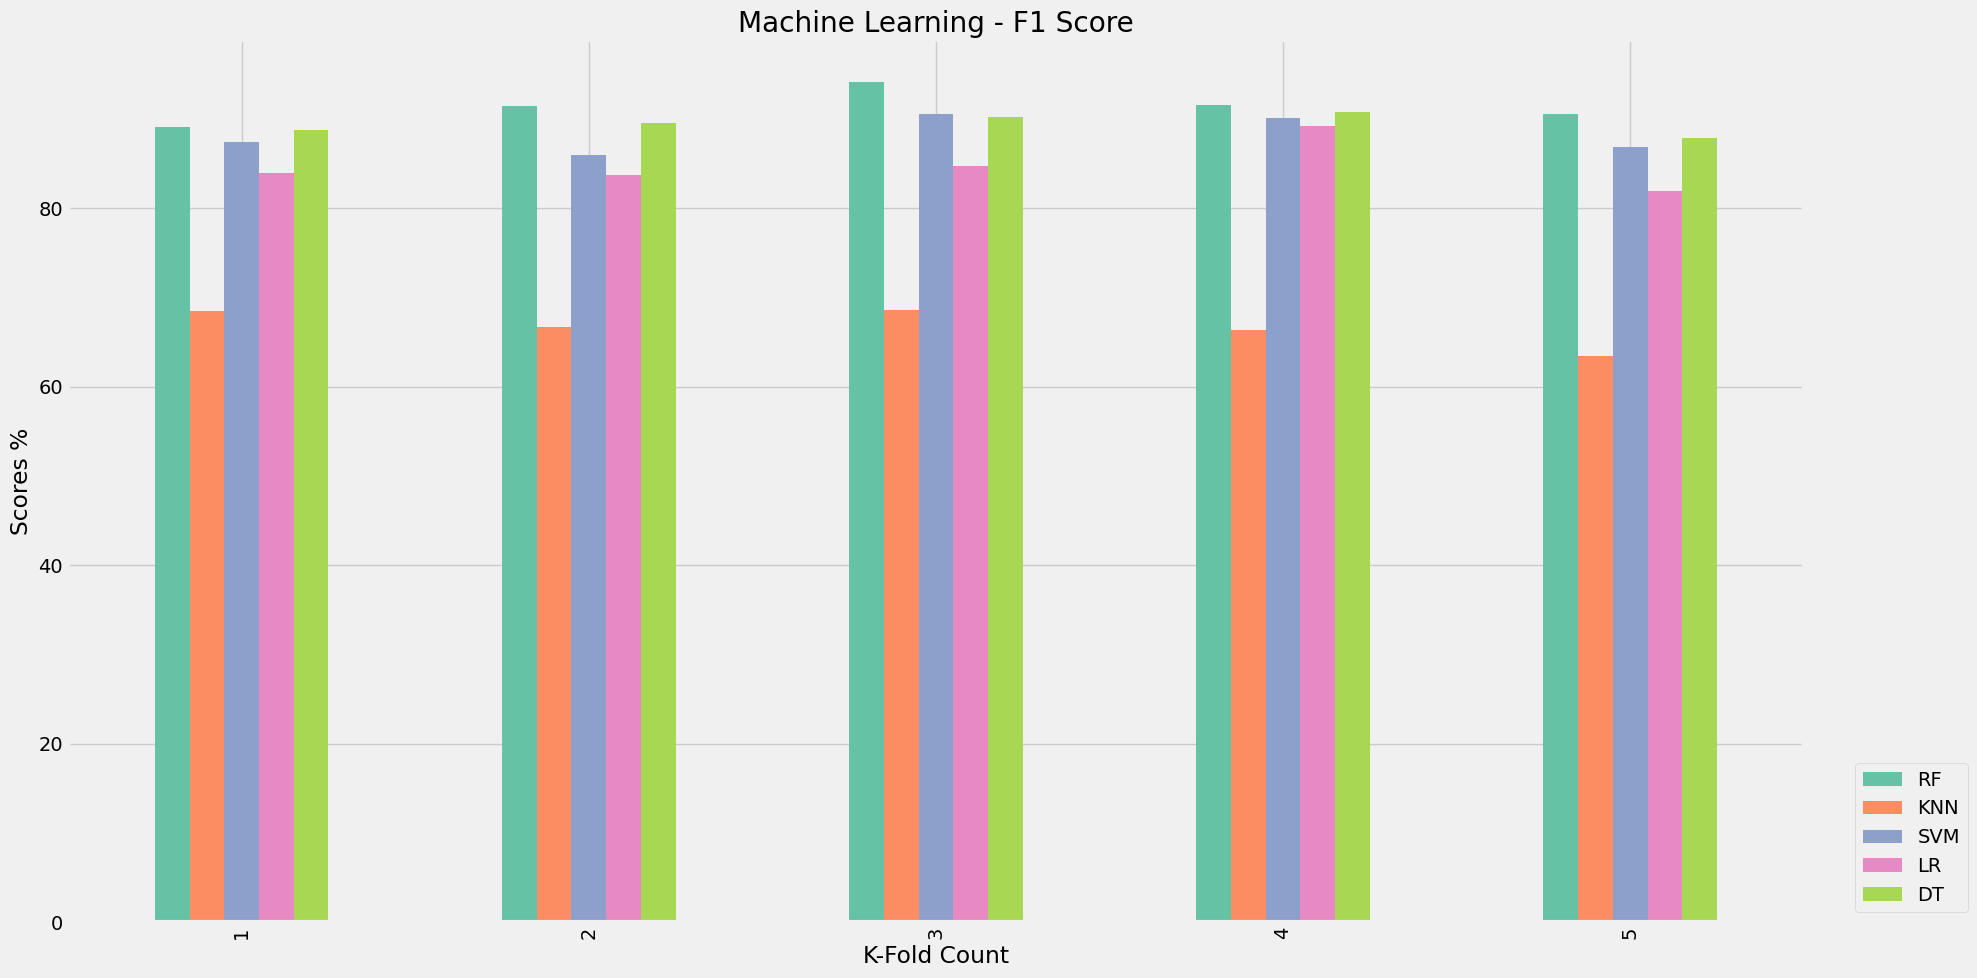

In [ ]:
# Create the bar plot
ML_f1_result.plot(kind='bar', figsize=(20, 10))

# Add labels and title
plt.xlabel('K-Fold Count')
plt.ylabel('Scores %')
plt.title('Machine Learning - F1 Score')

# Move the legend to the lower right
plt.legend(bbox_to_anchor =(1.1,0), loc='lower right')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Machine learning Accuracy score
ML_acc_result = pd.DataFrame(columns = ['K-Fold', 'RF', 'KNN', 'SVM', 'LR', 'DT'])


ml_acc_data = [
    ('Fold_1', 88.38, 66.39, 87.14, 83.82, 88.38, ),
    ('Fold_2', 91.29, 68.05, 86.31, 84.23, 89.21, ),
    ('Fold_3', 94.19, 68.05, 90.87, 85.06, 90.04, ),
    ('Fold_4', 91.29, 64.32, 90.04, 89.21, 90.46, ),
    ('Fold_5', 90.00, 61.67, 86.25, 81.25, 87.50)
]

ML_acc_result = pd.DataFrame.from_records(ml_acc_data, columns=ML_acc_result.columns)


# Rearranging index
ML_acc_result.index = np.arange(1, len(ML_acc_result) + 1)

ML_acc_result

,K-Fold,RF,KNN,SVM,LR,DT
1,Fold_1,88.38,66.39,87.14,83.82,88.38
2,Fold_2,91.29,68.05,86.31,84.23,89.21
3,Fold_3,94.19,68.05,90.87,85.06,90.04
4,Fold_4,91.29,64.32,90.04,89.21,90.46
5,Fold_5,90.00,61.67,86.25,81.25,87.50


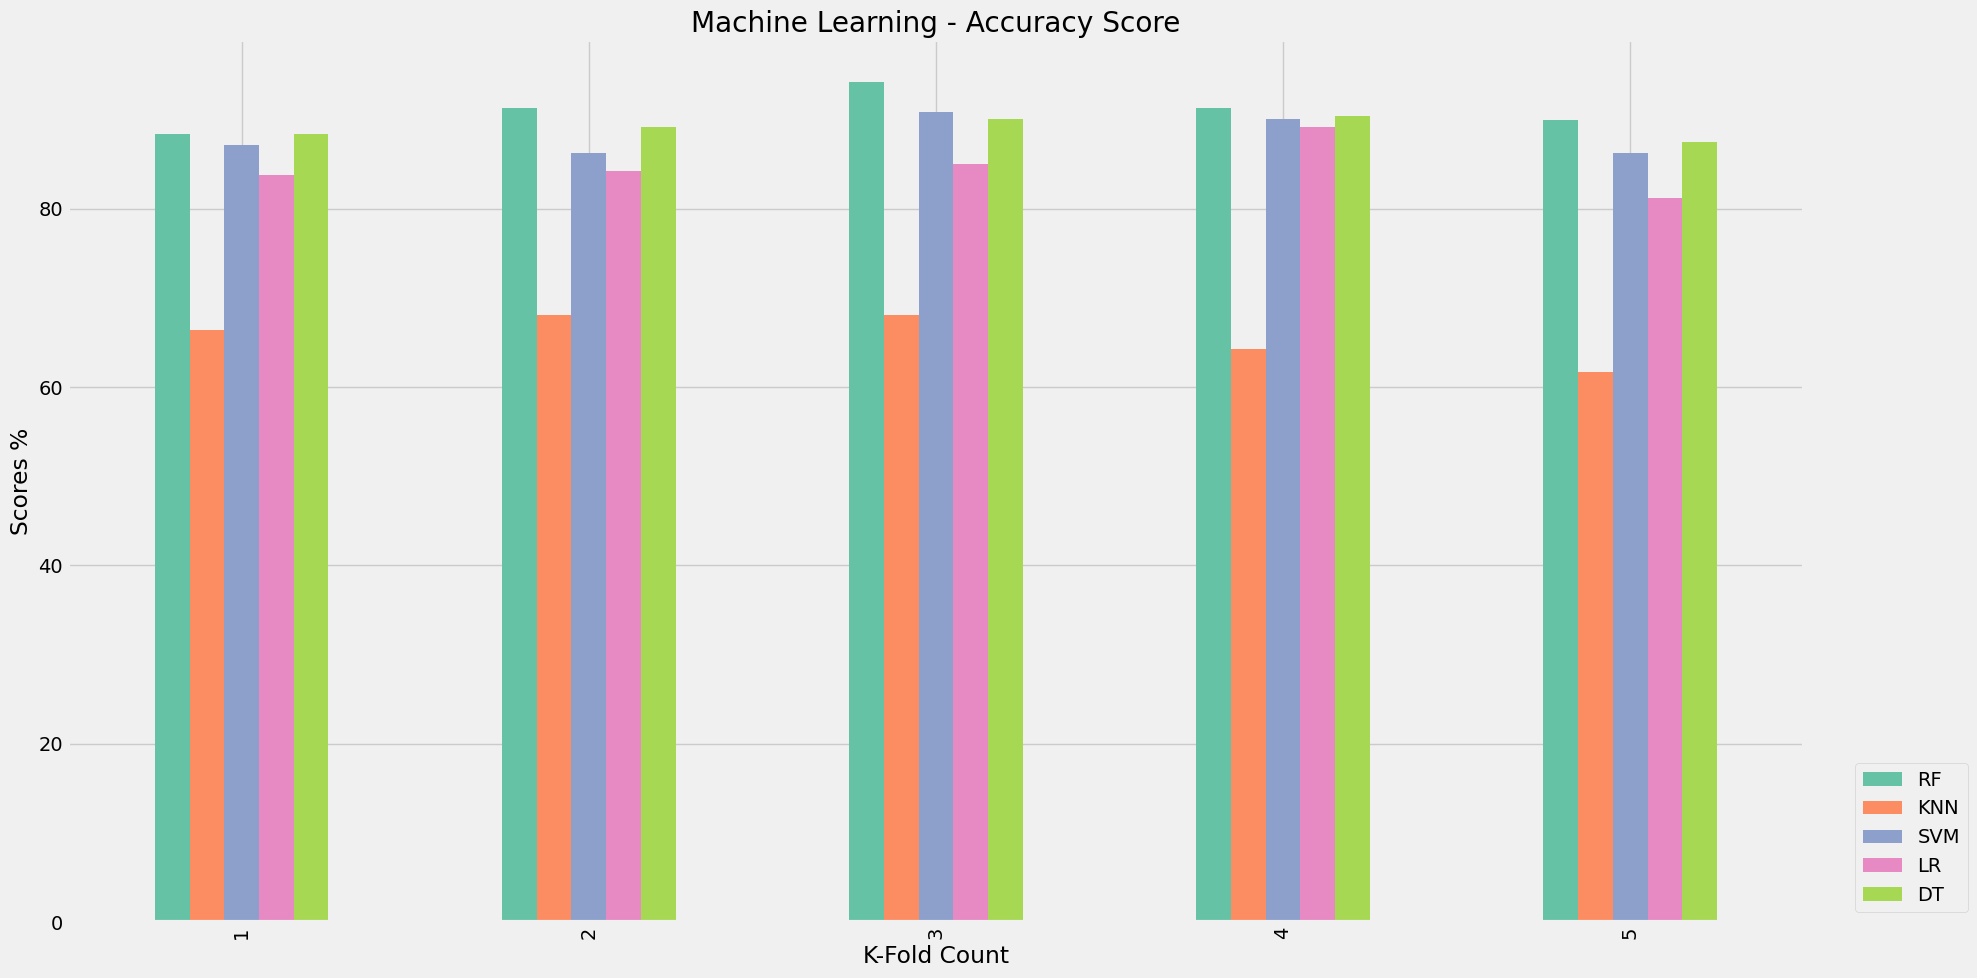

In [ ]:
# Create the bar plot
ML_acc_result.plot(kind='bar', figsize=(20, 10))

# Add labels and title
plt.xlabel('K-Fold Count')
plt.ylabel('Scores %')
plt.title('Machine Learning - Accuracy Score')

# Move the legend to the lower right
plt.legend(bbox_to_anchor =(1.1,0), loc='lower right')
plt.tight_layout()

# Show the plot
plt.show()


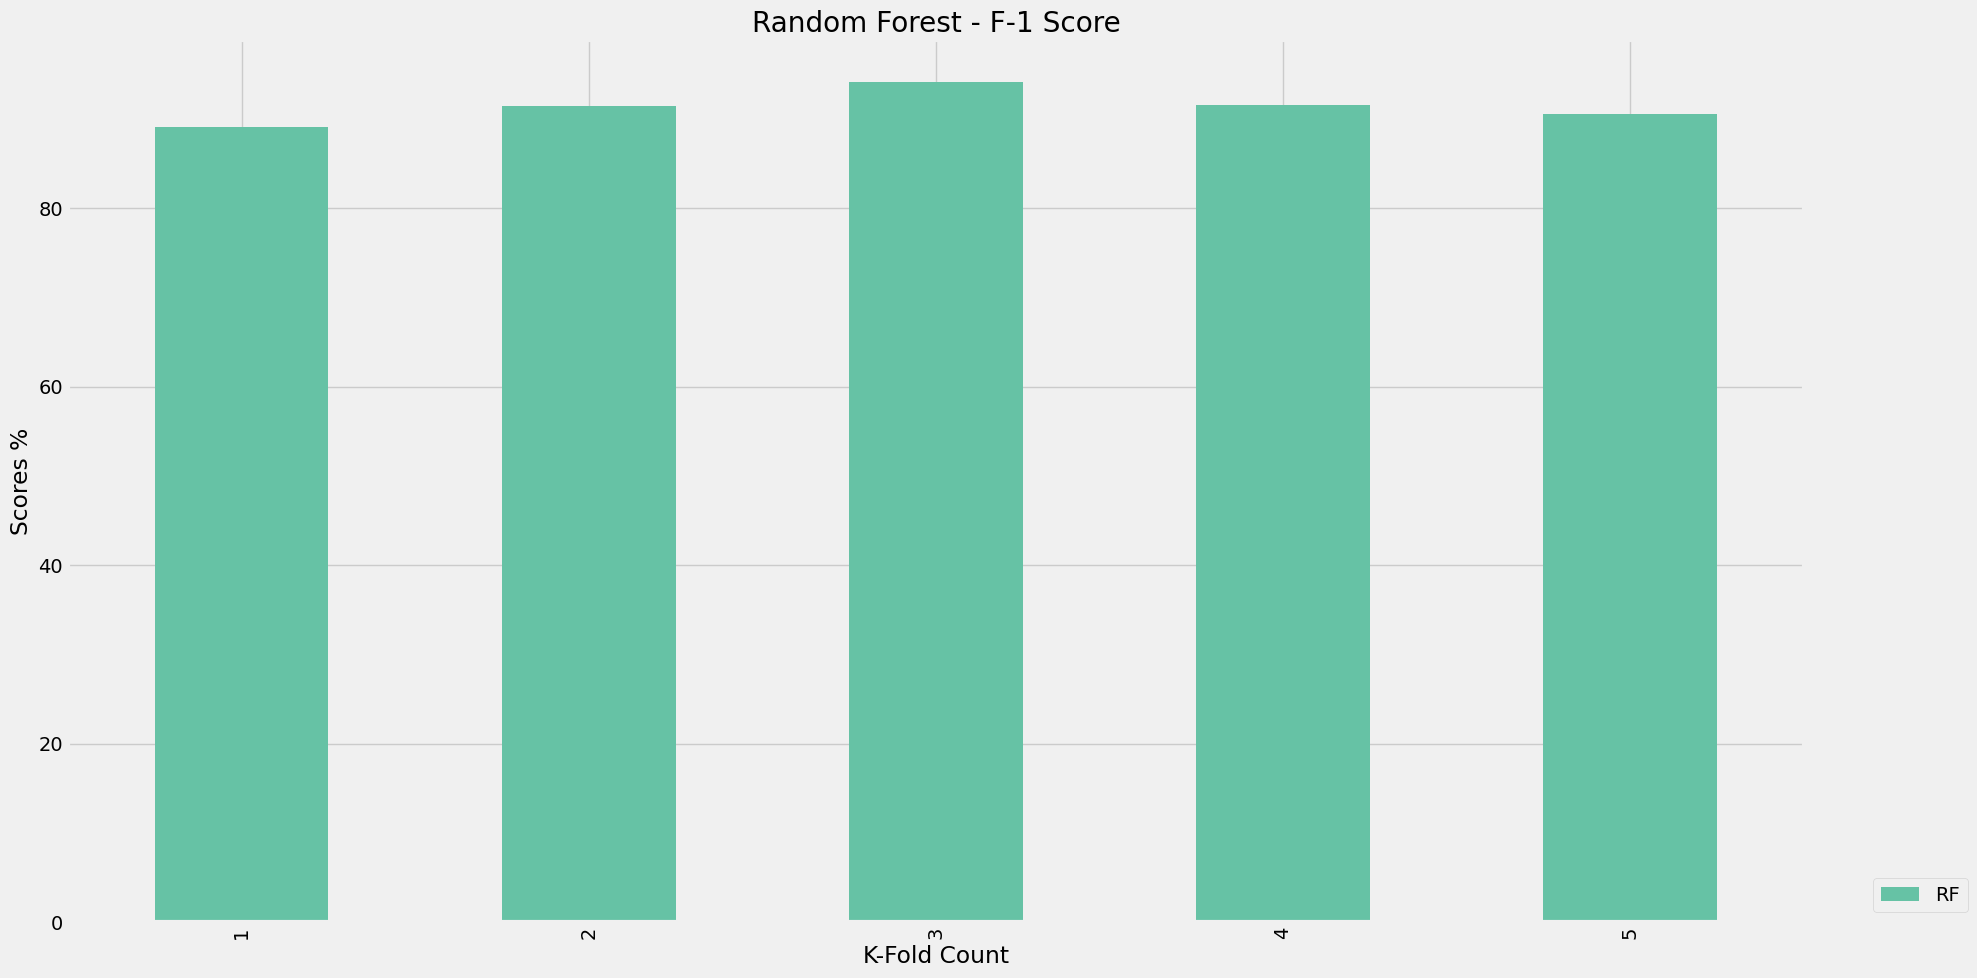

In [ ]:
# F-1 Score - Random Forest

ML_f1_result.plot(y=["RF"],
        kind="bar", figsize=(20, 10))

# Add labels and title
plt.xlabel('K-Fold Count')
plt.ylabel('Scores %')
plt.title('Random Forest - F-1 Score')

# Move the legend to the lower right
plt.legend(bbox_to_anchor =(1.1,0), loc='lower right')
plt.tight_layout()

# Show the plot
plt.show()


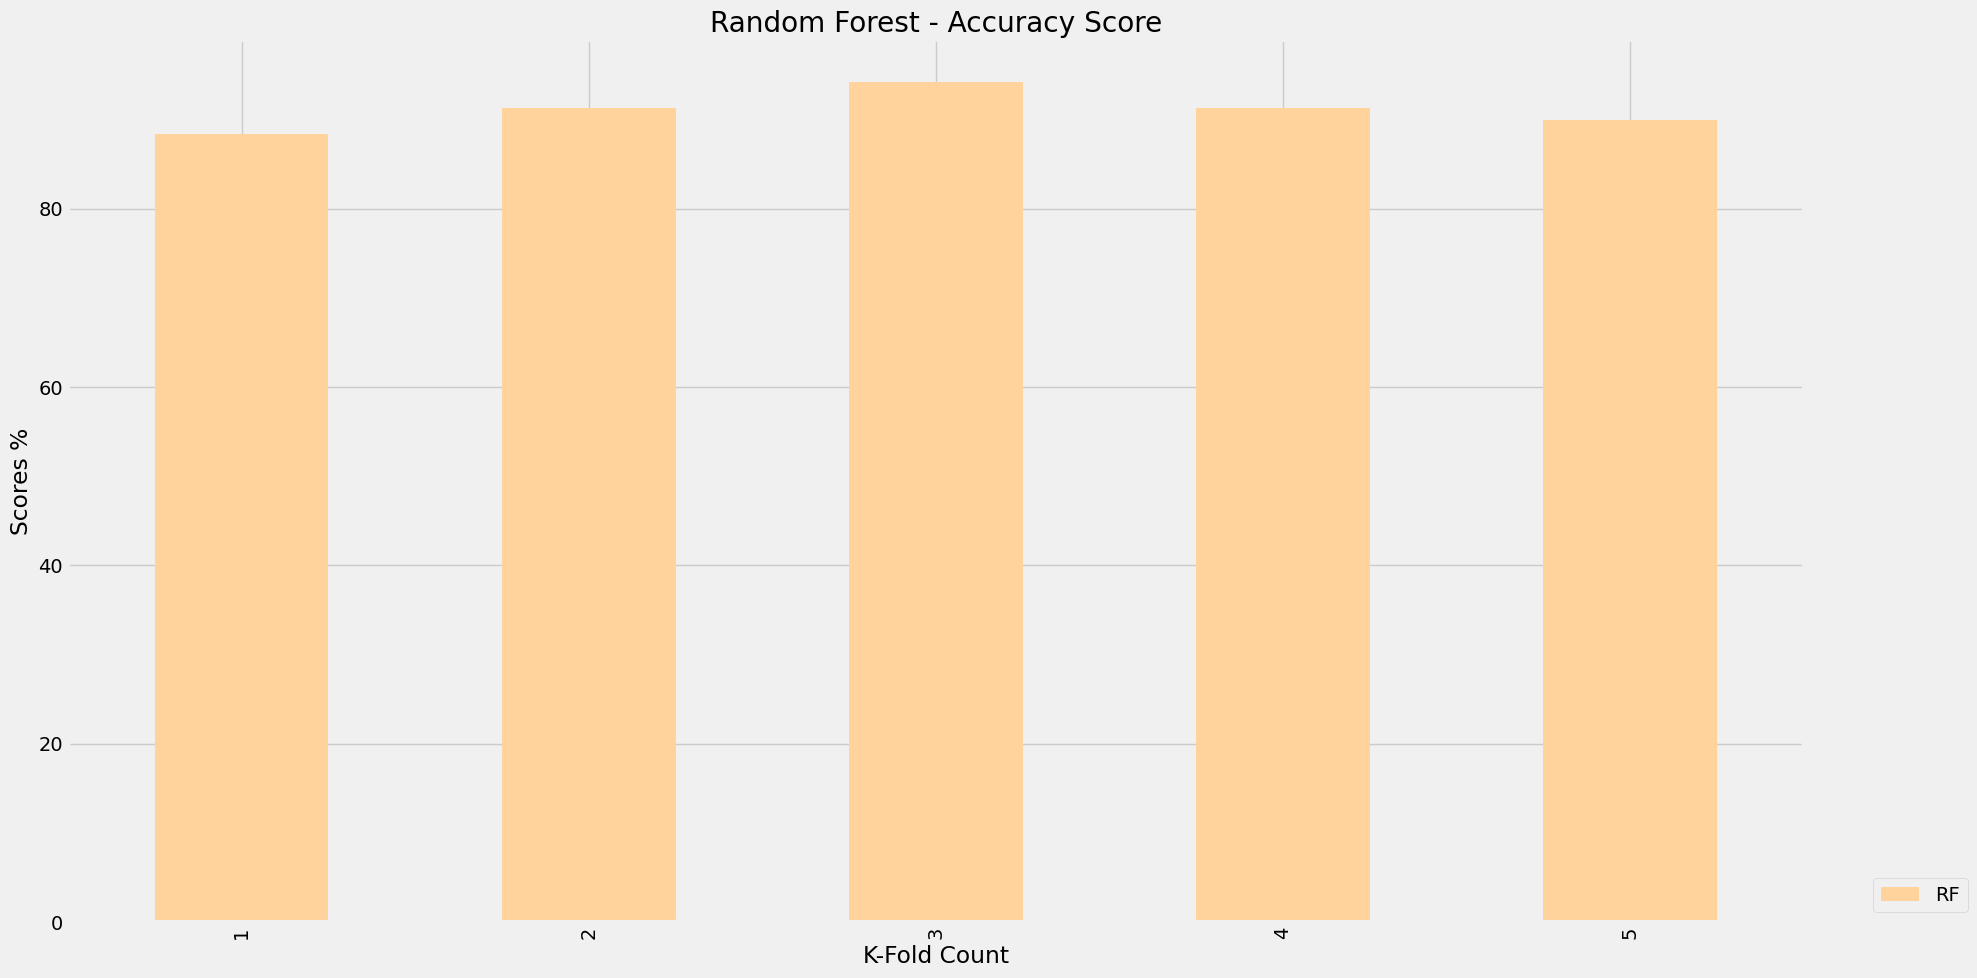

In [ ]:
# Accuracy Score - Random Forest
colour_code = '#FFD39B'

ML_acc_result.plot(y=["RF"],
        kind="bar", figsize=(20, 10), color = colour_code)

# Add labels and title
plt.xlabel('K-Fold Count')
plt.ylabel('Scores %')
plt.title('Random Forest - Accuracy Score')

# Move the legend to the lower right
plt.legend(bbox_to_anchor =(1.1,0), loc='lower right')
plt.tight_layout()

# Show the plot
plt.show()


# Feature Engineering

In [ ]:
# Feature Engineering F1 score
FE_f1_result = pd.DataFrame(columns = ['K-Fold', 'Pipeline_1', 'Pipeline_2', 'Pipeline_3', 'Pipeline_4'])


fe_f1_data = [
    ('Fold_1', 87.61, 87.61, 88.00, 88.00),
    ('Fold_2', 87.39, 88.39, 87.27, 87.39),
    ('Fold_3', 94.50, 94.50, 91.74, 93.64),
    ('Fold_4', 87.22, 88.79, 87.00, 88.79),
    ('Fold_5', 87.22, 87.34, 85.96, 87.22)
]

FE_f1_result = pd.DataFrame.from_records(fe_f1_data, columns=FE_f1_result.columns)

# Rearranging index
FE_f1_result.index = np.arange(1, len(FE_f1_result) + 1)

FE_f1_result

,K-Fold,Pipeline_1,Pipeline_2,Pipeline_3,Pipeline_4
1,Fold_1,87.61,87.61,88.00,88.00
2,Fold_2,87.39,88.39,87.27,87.39
3,Fold_3,94.50,94.50,91.74,93.64
4,Fold_4,87.22,88.79,87.00,88.79
5,Fold_5,87.22,87.34,85.96,87.22


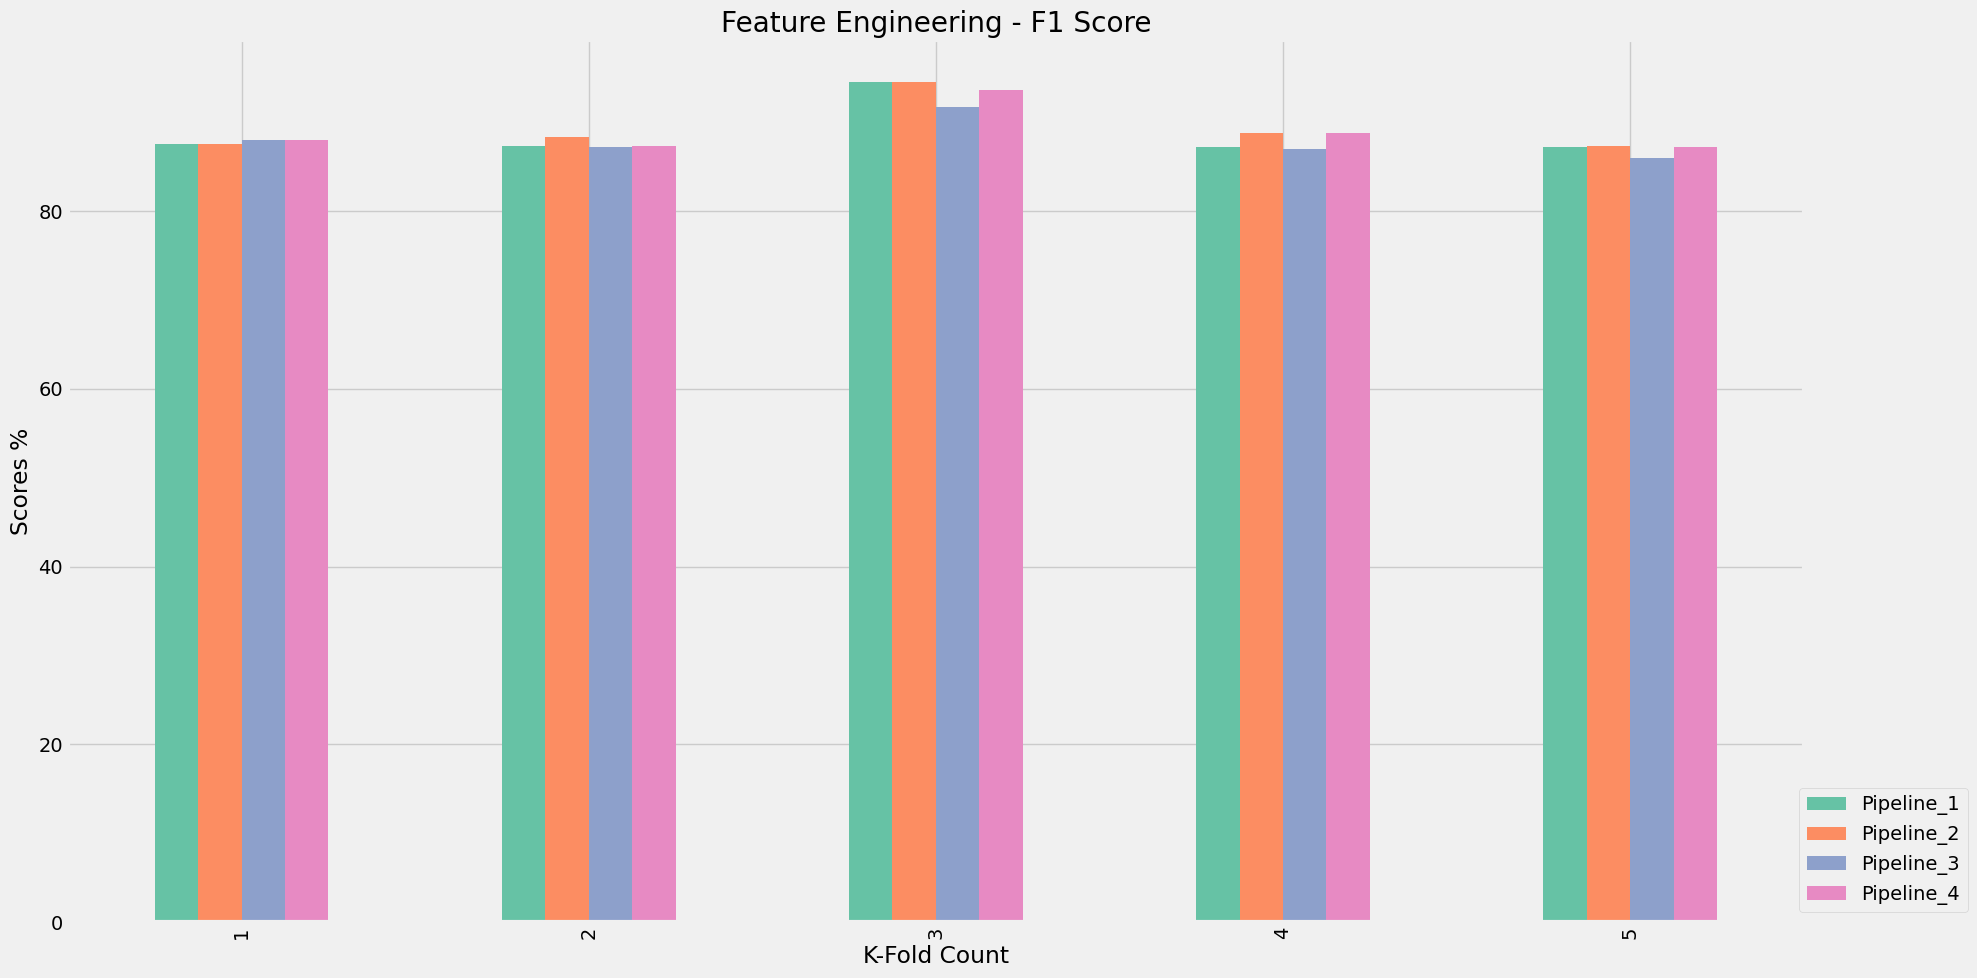

In [ ]:
# Create the bar plot
FE_f1_result.plot(kind='bar', figsize=(20, 10))

# Add labels and title
plt.xlabel('K-Fold Count')
plt.ylabel('Scores %')
plt.title('Feature Engineering - F1 Score')

# Move the legend to the lower right
plt.legend(bbox_to_anchor =(1.1,0), loc='lower right')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Feature Engineering Accuracy score
FE_acc_result = pd.DataFrame(columns = ['K-Fold', 'Pipeline_1', 'Pipeline_2', 'Pipeline_3', 'Pipeline_4'])


fe_acc_data = [
    ('Fold_1', 88.38, 88.38, 88.80, 88.80, ),
    ('Fold_2', 88.38, 89.21, 88.38, 88.38, ),
    ('Fold_3', 95.02, 95.02, 92.53, 94.19, ),
    ('Fold_4', 87.97, 89.63, 87.97, 89.63, ),
    ('Fold_5', 87.92, 87.92, 86.67, 87.92)
]

FE_acc_result = pd.DataFrame.from_records(fe_acc_data, columns=FE_acc_result.columns)

# Rearranging index
FE_acc_result.index = np.arange(1, len(FE_acc_result) + 1)

FE_acc_result

,K-Fold,Pipeline_1,Pipeline_2,Pipeline_3,Pipeline_4
1,Fold_1,88.38,88.38,88.80,88.80
2,Fold_2,88.38,89.21,88.38,88.38
3,Fold_3,95.02,95.02,92.53,94.19
4,Fold_4,87.97,89.63,87.97,89.63
5,Fold_5,87.92,87.92,86.67,87.92


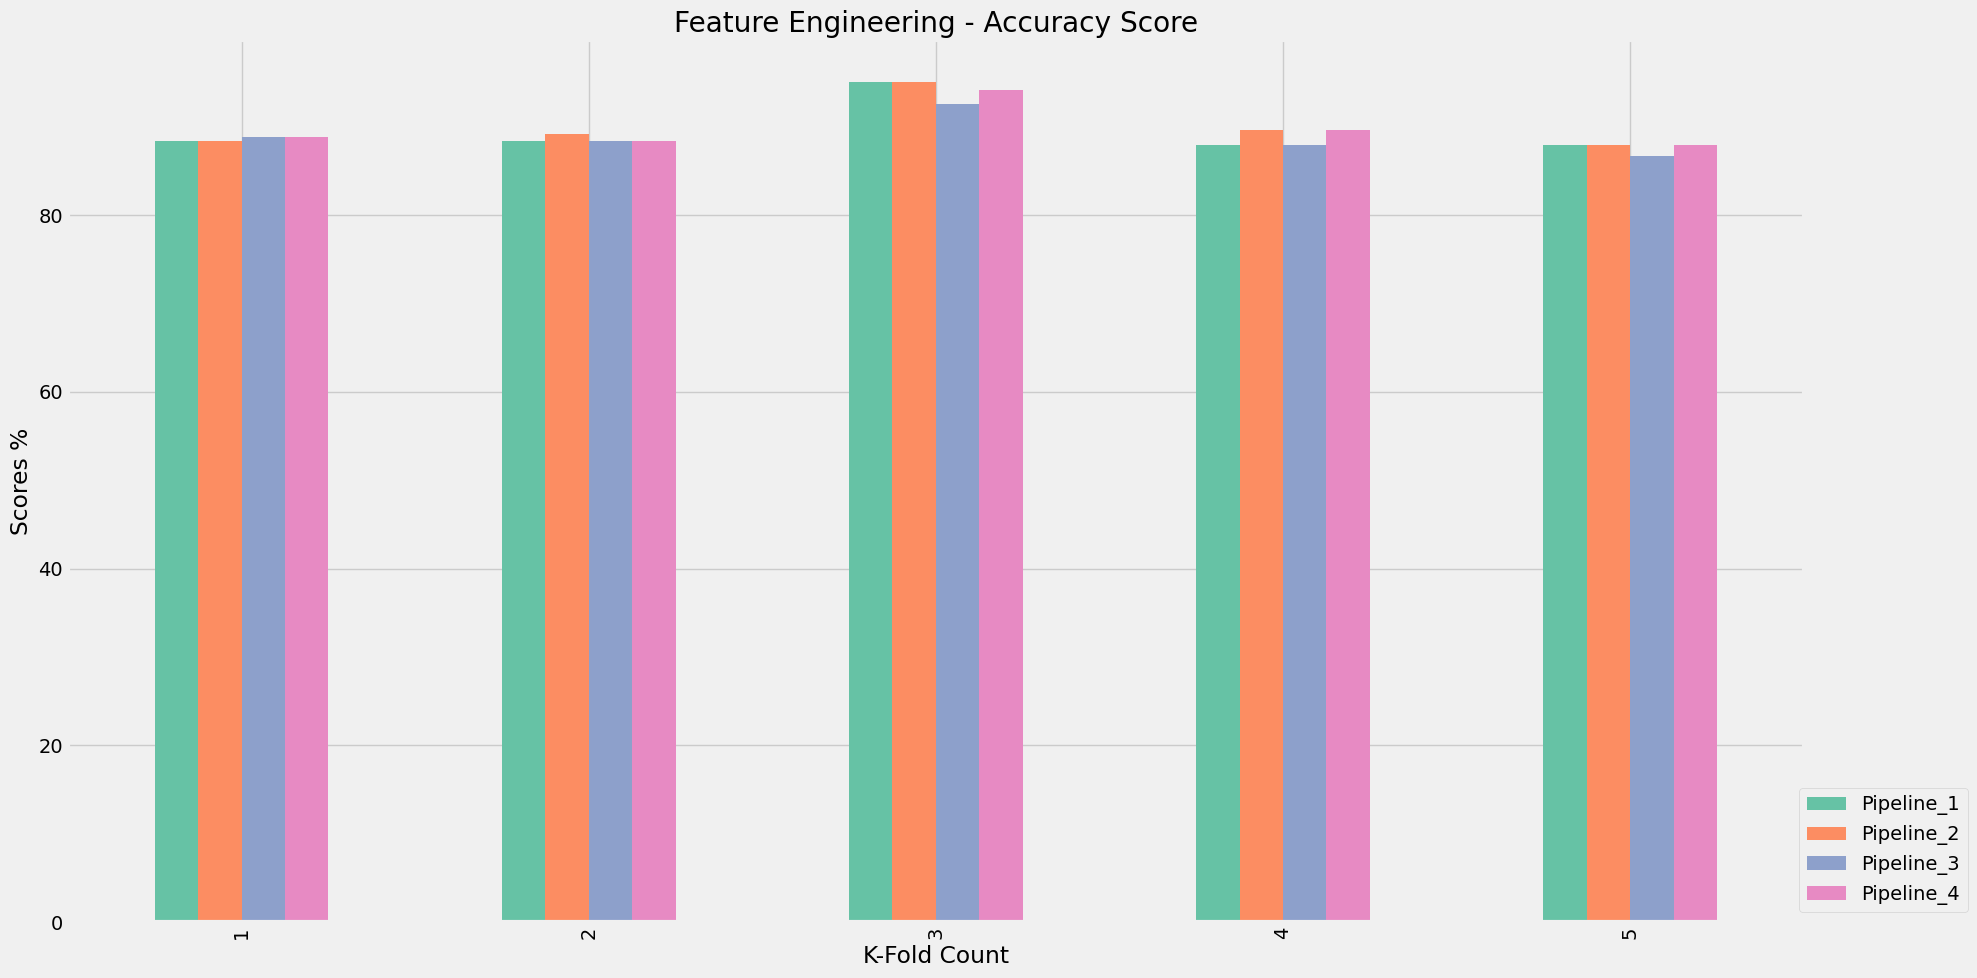

In [ ]:
# Create the bar plot
FE_acc_result.plot(kind='bar', figsize=(20, 10))

# Add labels and title
plt.xlabel('K-Fold Count')
plt.ylabel('Scores %')
plt.title('Feature Engineering - Accuracy Score')

# Move the legend to the lower right
plt.legend(bbox_to_anchor =(1.1,0), loc='lower right')
plt.tight_layout()

# Show the plot
plt.show()


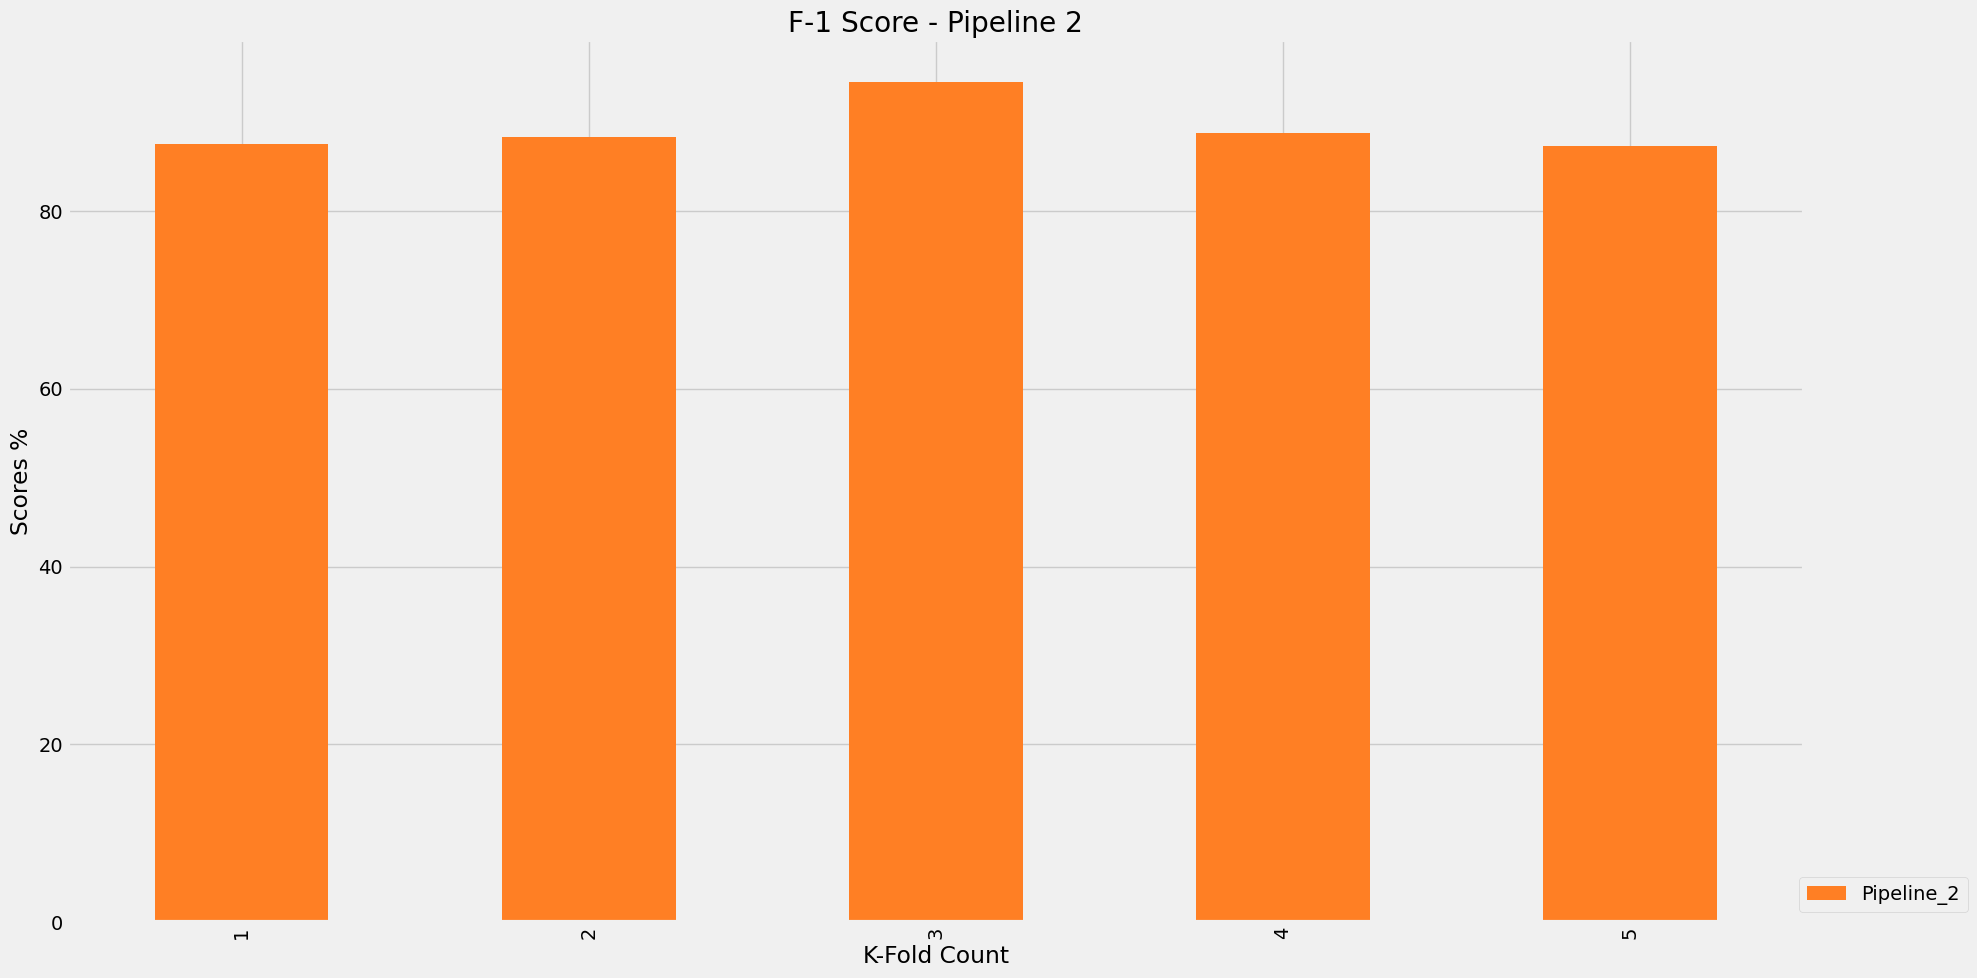

In [ ]:
# Feature Engineering - Pipeline 2
colour_code = "#FF7F24"
FE_f1_result.plot(y=["Pipeline_2"],
        kind="bar", figsize=(20, 10), color=colour_code)

# Add labels and title
plt.xlabel('K-Fold Count')
plt.ylabel('Scores %')
plt.title('F-1 Score - Pipeline 2')

# Move the legend to the lower right
plt.legend(bbox_to_anchor =(1.1,0), loc='lower right')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Feature Engineering - Pipeline 2
colour_code = "#E9967A"
FE_acc_result.plot(y=["Pipeline_2"],
        kind="bar", figsize=(20, 10), color=colour_code)

# Add labels and title
plt.xlabel('K-Fold Count')
plt.ylabel('Scores %')
plt.title('Accuracy Score - Pipeline 2')

# Move the legend to the lower right
plt.legend(bbox_to_anchor =(1.1,0), loc='lower right')
plt.tight_layout()

# Show the plot
plt.show()


## Artificial Neural Network (ANN)

In [ ]:
# Artificial Neural Network (ANN)
ANN_f1_result = pd.DataFrame(columns = ['K-Fold', 'F1_ANN'])


ANN_f1_data = [
    ('Fold_1', 80.83),
    ('Fold_2', 89.54),
    ('Fold_3', 97.37),
    ('Fold_4', 98.76),
    ('Fold_5', 99.19)
]

ANN_f1_result = pd.DataFrame.from_records(ANN_f1_data, columns=ANN_f1_result.columns)

# Rearranging index
ANN_f1_result.index = np.arange(1, len(ANN_f1_result) + 1)

ANN_f1_result

,K-Fold,F1_ANN
1,Fold_1,80.83
2,Fold_2,89.54
3,Fold_3,97.37
4,Fold_4,98.76
5,Fold_5,99.19


In [ ]:
# Artificial Neural Network (ANN)
ANN_acc_result = pd.DataFrame(columns = ['K-Fold', 'Accuracy_ANN'])


ANN_acc_data = [
    ('Fold_1', 80.91),
    ('Fold_2', 89.63),
    ('Fold_3', 97.51),
    ('Fold_4', 98.76),
    ('Fold_5', 99.17)
]

ANN_acc_result = pd.DataFrame.from_records(ANN_acc_data, columns=ANN_acc_result.columns)

# Rearranging index
ANN_acc_result.index = np.arange(1, len(ANN_acc_result) + 1)

ANN_acc_result

,K-Fold,Accuracy_ANN
1,Fold_1,80.91
2,Fold_2,89.63
3,Fold_3,97.51
4,Fold_4,98.76
5,Fold_5,99.17


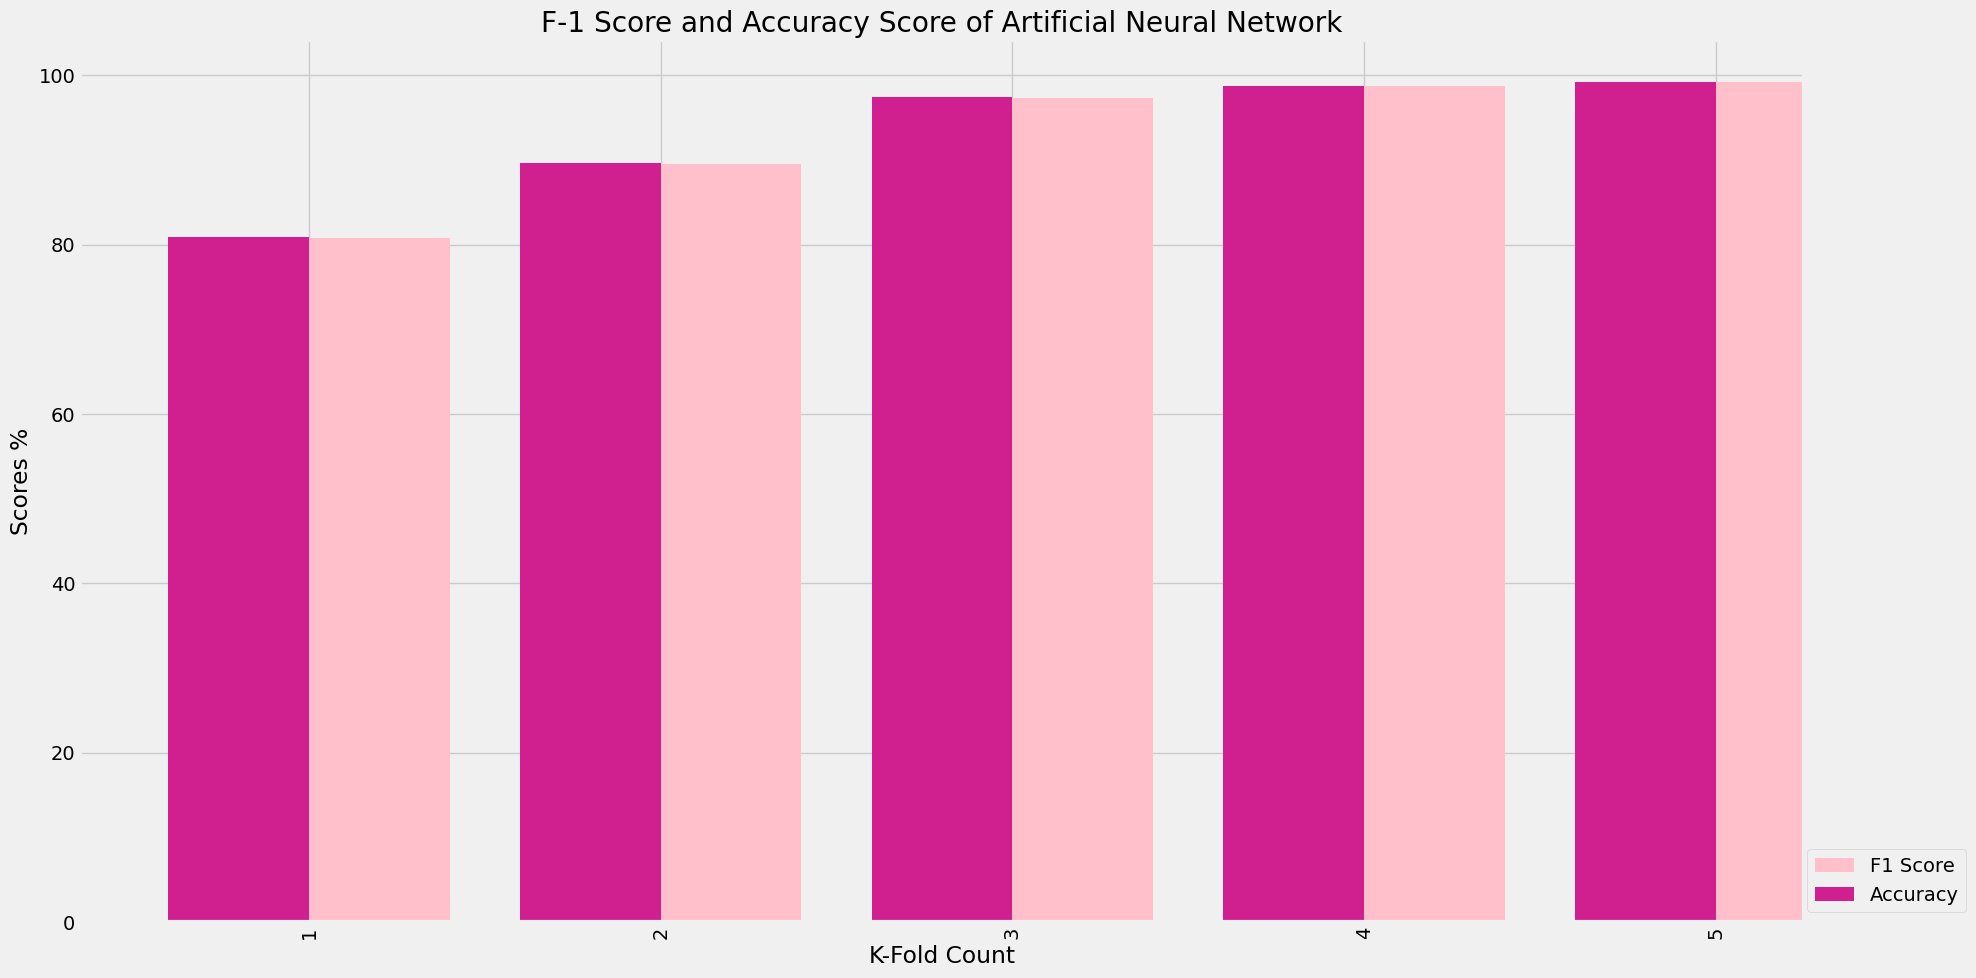

In [ ]:
# Create the bar plot
colour_code_f1 = "#FFC0CB"
colour_code_acc = "#D02090"

fig, ax = plt.subplots(figsize=(20, 10))

# Plot F1 scores from ANN_f1_result DataFrame
ANN_f1_result.plot(kind='bar', color=colour_code_f1, ax=ax, position=0, width=0.4)

# Plot Accuracy scores from ANN_acc_result DataFrame
ANN_acc_result.plot(kind='bar', color=colour_code_acc, ax=ax, position=1, width=0.4)

# Add labels and title
plt.xlabel('K-Fold Count')
plt.ylabel('Scores %')
plt.title('F-1 Score and Accuracy Score of Artificial Neural Network')

# Move the legend to the lower right
plt.legend(['F1 Score', 'Accuracy'], bbox_to_anchor=(1.1, 0), loc='lower right')
plt.tight_layout()

# Show the plot
plt.show()


# Comparing Machine Learning (Random Forest), Feature Engineering (Pipeline 2) and Artificial Neural Network (ANN)

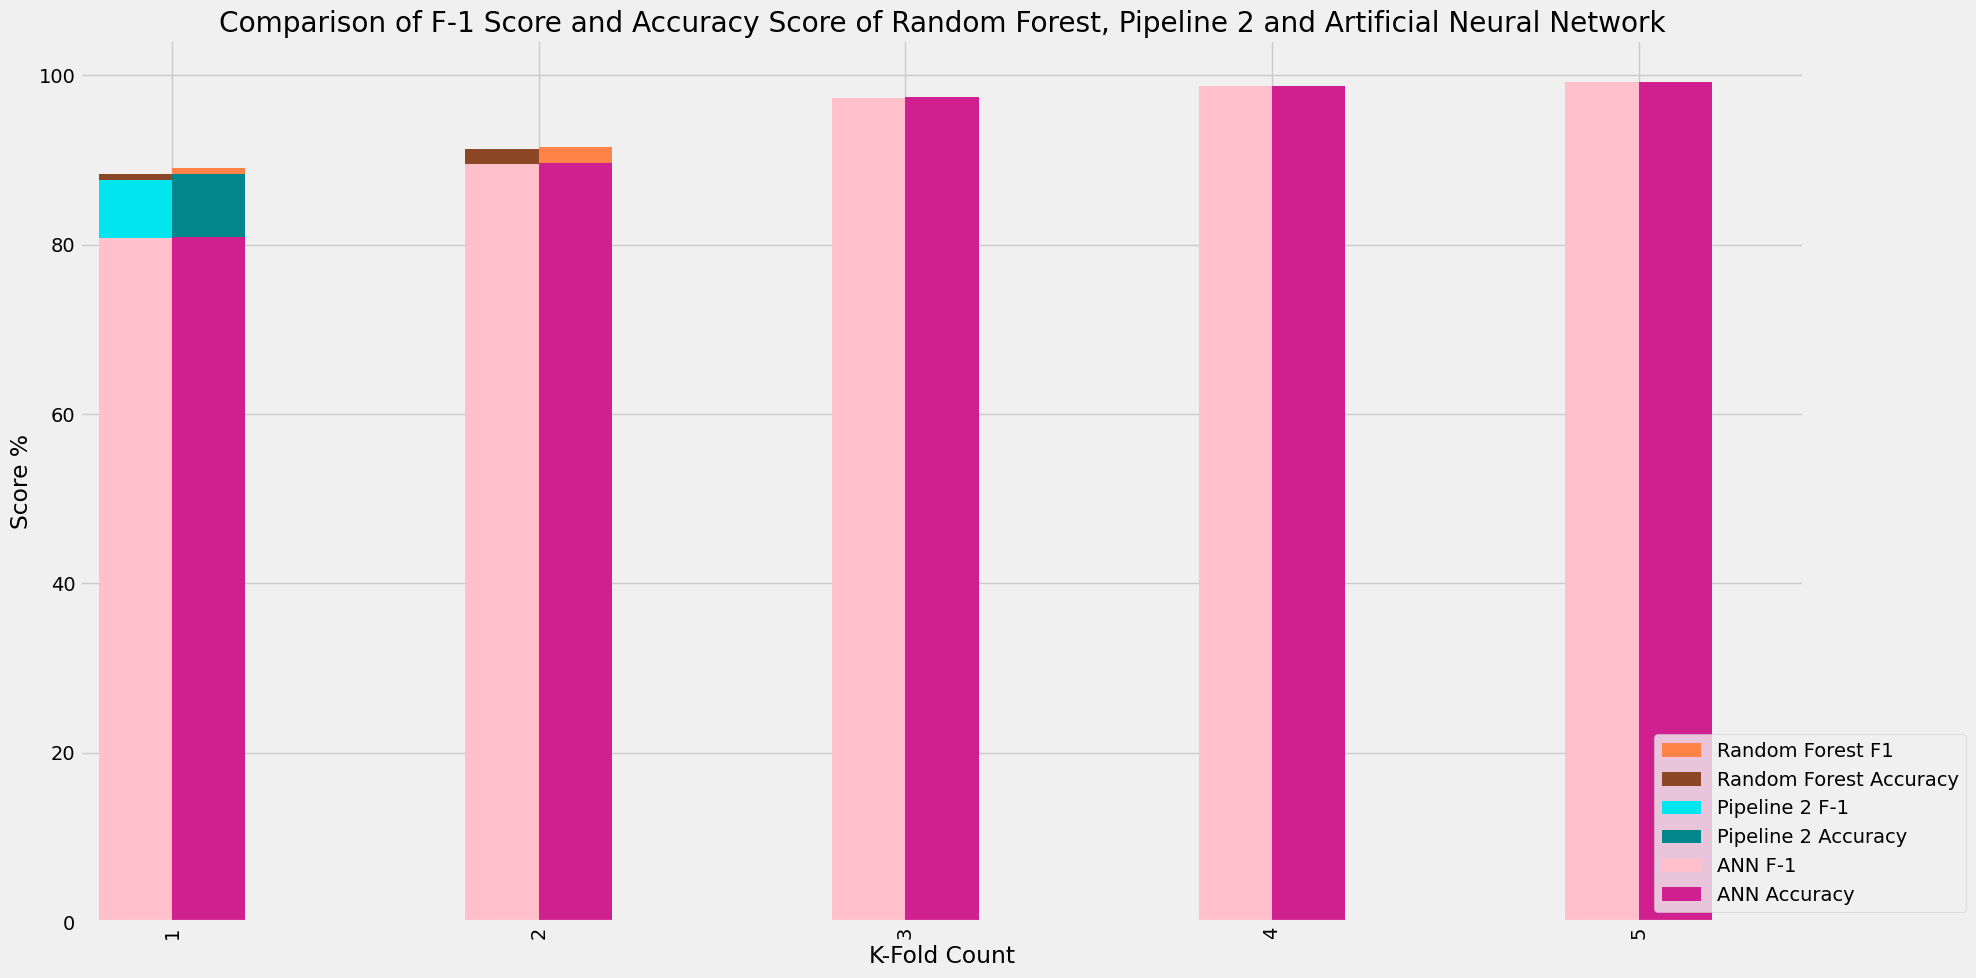

In [ ]:
# Define color codes for each dataframe
colour_code_ml_f1 = "#FF8247"
colour_code_ml_acc = "#8B4726"
colour_code_fe_f1 = "#00E5EE"
colour_code_fe_acc = "#00868B"
colour_code_ann_f1 = "#FFC0CB"
colour_code_ann_acc = "#D02090"

# Select specific columns from each dataframe
mlf1_columns = ['K-Fold', 'RF']
mlacc_columns = ['K-Fold', 'RF']
fef1_columns = ['K-Fold', 'Pipeline_2']
feacc_columns = ['K-Fold', 'Pipeline_2']
annf1_columns = ['K-Fold', 'F1_ANN']
annacc_columns = ['K-Fold', 'Accuracy_ANN']


# Create the bar plots for each dataframe with selected columns
fig, ax = plt.subplots(figsize=(20, 10))

ML_f1_result[mlf1_columns].plot(kind='bar', color=colour_code_ml_f1, ax=ax, position=0, width=0.2)
ML_acc_result[mlacc_columns].plot(kind='bar', color=colour_code_ml_acc, ax=ax, position=1, width=0.2)
FE_f1_result[fef1_columns].plot(kind='bar', color=colour_code_fe_f1, ax=ax, position=1, width=0.2)
FE_acc_result[feacc_columns].plot(kind='bar', color=colour_code_fe_acc, ax=ax, position=0, width=0.2)
ANN_f1_result[annf1_columns].plot(kind='bar', color=colour_code_ann_f1, ax=ax, position=1, width=0.2)
ANN_acc_result[annacc_columns].plot(kind='bar', color=colour_code_ann_acc, ax=ax, position=0, width=0.2)


# Add labels and title
plt.xlabel('K-Fold Count')
plt.ylabel('Score %')
plt.title('Comparison of F-1 Score and Accuracy Score of Random Forest, Pipeline 2 and Artificial Neural Network')


# Move the legend to the lower right
plt.legend(['Random Forest F1', 'Random Forest Accuracy', 'Pipeline 2 F-1', 'Pipeline 2 Accuracy', 'ANN F-1', 'ANN Accuracy'], bbox_to_anchor=(1.1, 0), loc='lower right')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Merging the dataframe for numerical comparison
merged_f1 = pd.concat([ML_f1_result, FE_f1_result, ANN_f1_result], axis=1)

# Removing duplicates column
merged_f1 = merged_f1.loc[:, ~merged_f1.columns.duplicated()]

# Saving the excel file into computer
merged_f1.to_csv('insurance_f1.csv', index=False)

merged_f1

,K-Fold,RF,KNN,SVM,LR,DT,Pipeline_1,Pipeline_2,Pipeline_3,Pipeline_4,F1_ANN
1,Fold_1,89.06,68.48,87.45,83.95,88.80,87.61,87.61,88.00,88.00,80.83
2,Fold_2,91.50,66.67,85.96,83.76,89.52,87.39,88.39,87.27,87.39,89.54
3,Fold_3,94.12,68.57,90.52,84.75,90.24,94.50,94.50,91.74,93.64,97.37
4,Fold_4,91.57,66.41,90.08,89.26,90.76,87.22,88.79,87.00,88.79,98.76
5,Fold_5,90.55,63.49,86.85,81.93,87.90,87.22,87.34,85.96,87.22,99.19


In [ ]:
# Merging the dataframe for numerical comparison
merged_acc = pd.concat([ML_acc_result, FE_acc_result, ANN_acc_result], axis=1)

# Removing duplicates column
merged_acc = merged_acc.loc[:, ~merged_acc.columns.duplicated()]

# Saving the excel file into computer
merged_acc.to_csv('insurance_acc.csv', index=False)

merged_acc

,K-Fold,RF,KNN,SVM,LR,DT,Pipeline_1,Pipeline_2,Pipeline_3,Pipeline_4,Accuracy_ANN
1,Fold_1,88.38,66.39,87.14,83.82,88.38,88.38,88.38,88.80,88.80,80.91
2,Fold_2,91.29,68.05,86.31,84.23,89.21,88.38,89.21,88.38,88.38,89.63
3,Fold_3,94.19,68.05,90.87,85.06,90.04,95.02,95.02,92.53,94.19,97.51
4,Fold_4,91.29,64.32,90.04,89.21,90.46,87.97,89.63,87.97,89.63,98.76
5,Fold_5,90.00,61.67,86.25,81.25,87.50,87.92,87.92,86.67,87.92,99.17
